In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
%matplotlib inline

In [2]:
#import data and visualize it
df = pd.read_csv('survey_data.csv')
print(df.shape)
print(df.dtypes)
df.head()

(8594, 13)
cntry       object
idno       float64
year         int64
tvtot      float64
ppltrst    float64
pplfair    float64
pplhlp     float64
happy      float64
sclmeet    float64
sclact     float64
gndr       float64
agea       float64
partner    float64
dtype: object


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
#get a list of unique countries
countries = df['cntry'].unique()
df.groupby('cntry').size()

cntry
CH    1546
CZ    1316
DE      28
ES    2426
NO    1462
SE    1816
dtype: int64

In [4]:
#save a data frame where the year is 2012 and 2014
df2012 = df[df['year']==6]
print(df2012.shape)
df2014 = df[df['year']==7]
print(df2014.shape)

(4297, 13)
(4297, 13)


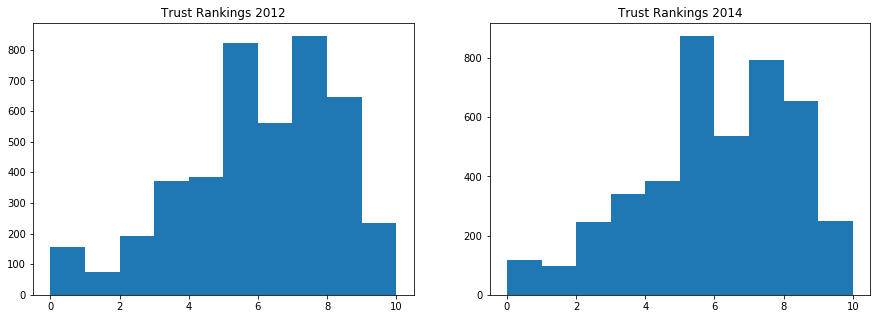

In [5]:
#check for normality in the people trust feature
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.hist(df2012.ppltrst.dropna())
plt.title('Trust Rankings 2012')
plt.subplot(122)
plt.hist(df2014.ppltrst.dropna())
plt.title('Trust Rankings 2014')

plt.show()

In [6]:
#paired ttest between two the two years for the people trust feature
stats.ttest_rel(df2012.ppltrst, df2014.ppltrst, nan_policy='omit')

Ttest_relResult(statistic=0.07575168043269885, pvalue=0.9396201977999982)

In [7]:
#paired ttest for each country for the people trust feature
for country in countries:
    frame2012 = df2012[df2012['cntry']==country]
    frame2014 = df2014[df2014['cntry']==country]
    print(country +':', stats.ttest_rel(frame2012.ppltrst, frame2014.ppltrst, nan_policy='omit'))

CH: Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)
CZ: Ttest_relResult(statistic=-0.5001638336887216, pvalue=0.617129268240474)
DE: Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)
ES: Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725320272)
NO: Ttest_relResult(statistic=0.5073077081124404, pvalue=0.61209257015177)
SE: Ttest_relResult(statistic=-2.0671082026033982, pvalue=0.03900781670958545)


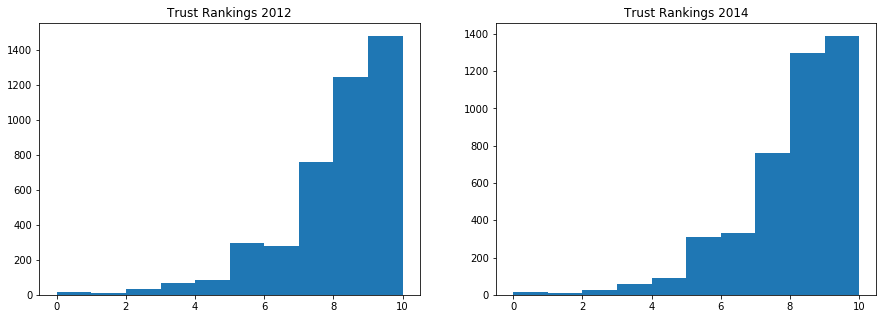

In [8]:
#check for normality in the happiness feature
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.hist(df2012.happy.dropna())
plt.title('Trust Rankings 2012')
plt.subplot(122)
plt.hist(df2014.happy.dropna())
plt.title('Trust Rankings 2014')

plt.show()

In [9]:
#run a wilcoxon test on the happiness feature for each country
for country in countries:
    frame2012 = df2012[df2012['cntry']==country]
    frame2014 = df2014[df2014['cntry']==country]
    print(country +':', stats.wilcoxon(frame2012.happy, frame2014.happy))

CH: WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)
CZ: WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)
DE: WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)
ES: WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)
NO: WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)
SE: WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)


C:\Users\zackb\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2388: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
C:\Users\zackb\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2389: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


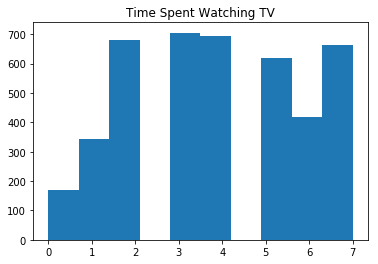

In [10]:
plt.hist(df2012.tvtot.dropna())
plt.title('Time Spent Watching TV')
plt.show()

In [11]:
#1 = male, 2 = female
df2012.groupby('gndr')['tvtot'].describe()

,count,mean,std,min,25%,50%,75%,max
gndr,,,,,,,,
1.0,2151.0,3.901906,1.983690,0.0,2.0,4.0,5.0,7.0
2.0,2140.0,3.944393,2.049457,0.0,2.0,4.0,6.0,7.0


In [12]:
male2012 = df2012[df2012['gndr']==1]
female2012 = df2012[df2012['gndr']==2]

stats.ttest_ind(male2012.tvtot, female2012.tvtot, nan_policy='omit')    

Ttest_indResult(statistic=-0.6899928109209502, pvalue=0.49023604027095813)

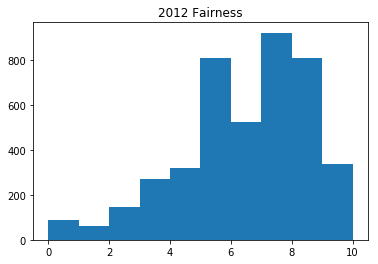

In [13]:
plt.hist(df2012.pplfair.dropna())
plt.title('2012 Fairness')
plt.show()

In [14]:
#1 = lives with partner      2 = lives without partner 
df2012.groupby('partner')['pplfair'].describe()

,count,mean,std,min,25%,50%,75%,max
partner,,,,,,,,
1.0,2663.0,6.080736,2.116945,0.0,5.0,7.0,8.0,10.0
2.0,1608.0,5.856965,2.162229,0.0,5.0,6.0,7.0,10.0


In [15]:
partner2012 = df2012[df2012['partner']==1]
nopartner2012 = df2012[df2012['partner']==2]

print(stats.ttest_ind(partner2012.pplfair, nopartner2012.pplfair, nan_policy='omit'))
print(stats.mannwhitneyu(partner2012.pplfair, nopartner2012.pplfair))

Ttest_indResult(statistic=3.3201033970362084, pvalue=0.0009073952609876207)
MannwhitneyuResult(statistic=2019588.5, pvalue=0.00013938009002030226)


In [31]:
print(df2014.groupby('cntry')['sclmeet'].median())
df2014.groupby('cntry')['sclmeet'].describe()

cntry
CH    6.0
CZ    4.0
DE    4.0
ES    6.0
NO    6.0
SE    6.0
Name: sclmeet, dtype: float64


,count,mean,std,min,25%,50%,75%,max
cntry,,,,,,,,
CH,772.0,5.160622,1.308499,1.0,4.0,6.0,6.0,7.0
CZ,655.0,4.445802,1.481706,1.0,4.0,4.0,6.0,7.0
DE,14.0,4.428571,0.755929,3.0,4.0,4.0,5.0,6.0
ES,1211.0,5.260116,1.467855,1.0,4.0,6.0,6.0,7.0
NO,731.0,5.302326,1.347848,1.0,4.0,6.0,6.0,7.0
SE,908.0,5.426211,1.373098,2.0,4.0,6.0,7.0,7.0


In [22]:
CH2014 = df2014[df2014['cntry']=='CH']
ES2014 = df2014[df2014['cntry']=='ES']
SE2014 = df2014[df2014['cntry']=='SE']

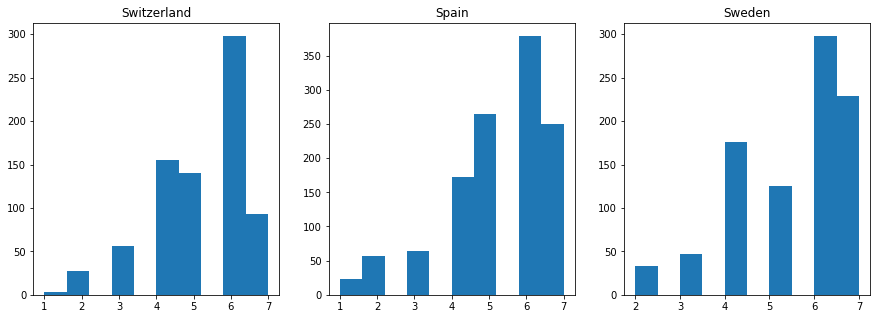

In [25]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.title('Switzerland')
plt.hist(CH2014.sclmeet.dropna())

plt.subplot(132)
plt.title('Spain')
plt.hist(ES2014.sclmeet.dropna())

plt.subplot(133)
plt.title('Sweden')
plt.hist(SE2014.sclmeet.dropna())

plt.show()

In [27]:
print(stats.kruskal(CH2014.sclmeet, ES2014.sclmeet, SE2014.sclmeet, nan_policy='omit'))
print(stats.mannwhitneyu(CH2014.sclmeet, ES2014.sclmeet))
print(stats.mannwhitneyu(CH2014.sclmeet, SE2014.sclmeet))
print(stats.mannwhitneyu(SE2014.sclmeet, ES2014.sclmeet))

KruskalResult(statistic=20.974963481937596, pvalue=2.7883324361335602e-05)
MannwhitneyuResult(statistic=438471.5, pvalue=0.006038752118787105)
MannwhitneyuResult(statistic=306883.0, pvalue=2.2172680635176644e-06)
MannwhitneyuResult(statistic=519084.0, pvalue=0.009891124672583993)


In [30]:
print(stats.ttest_ind(CH2014.sclmeet, ES2014.sclmeet, nan_policy='omit'))
print(stats.ttest_ind(CH2014.sclmeet, SE2014.sclmeet, nan_policy='omit'))
print(stats.ttest_ind(SE2014.sclmeet, ES2014.sclmeet, nan_policy='omit'))

Ttest_indResult(statistic=-1.5343317353073618, pvalue=0.12510774525055496)
Ttest_indResult(statistic=-4.037131044403062, pvalue=5.6545986003136826e-05)
Ttest_indResult(statistic=2.649547268580078, pvalue=0.0081199227965194)


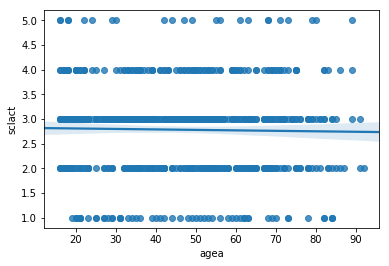

In [32]:
sns.regplot(x=CH2014.agea, y=CH2014.sclact)